In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from functools import reduce

from functions_file import *
print(testfunction(4))

16


## Model-based Approach

In [50]:
min_mean_speed = 15 #km/h
min_duration_of_stops = 5 #seconds

In [51]:
def calc_mean_all_with_speed(g1):
    q_m, k_m, s_m,l_m, v_origin_m, v_target_m = [0,0,0,0,0,0]
    for i in g1:
        q_m += i[0]
        k_m += i[1]
        s_m += i[2]
        l_m += i[3]
        v_origin_m += i[4]
        v_target_m += i[5]
    dev = len(g1)    
    return ["{:.3f}".format(q_m/dev),
            "{:.3f}".format(k_m/dev),
            "{:.3f}".format(s_m/dev),
            "{:.3f}".format(l_m/dev),
            "{:.3f}".format(v_origin_m/dev),
            "{:.3f}".format(v_target_m/dev)]

In [52]:
method = 'NNFD_w_events_one_stage'
numruns = 20
one_NNFD = pd.read_pickle('../output/result_runs_w_events/%s_%s_runs.pkl'%(method,numruns))

In [53]:
#relevant scenario with one stage nnfd, including speeeds
ot = one_NNFD[one_NNFD.Pol=='total']
one_NNFD_r2n = ot.groupby('Scenario')['R2_n'].apply(lambda x: calc_mean_all_with_speed(x))
one_NNFD_mape = ot.groupby('Scenario')['MAPE'].apply(lambda x: calc_mean_all_with_speed(x))

In [54]:
one_stage_results = {'r2d_NNFD':one_NNFD_r2,
                     'r2n_NNFD':one_NNFD_r2n,
                     'map_NNFD':one_NNFD_mape}

def process_one_stage(one_stage_results, assess_method):
    one_stage = []
    labels_one = []
    for key,val in one_stage_results.items():
        if (key[:3]==assess_method):
            temp = pd.DataFrame(val)
            temp[['q','k','stop','lc','v_ori','v_tar']] = pd.DataFrame(temp[temp.columns[0]].tolist(), index= temp.index) 
            one_stage.append(temp)
            labels_one.append(key)   
    return one_stage, labels_one

scenario_names = ['Scenario 1','Scenario 2', 'Scenario 5','Scenario 3','Scenario 4']

column_names = {'q':'Flow $q$', 'k': 'Density $k$', 'lc':'Lane changes',
             'stop':'Stops', 'v_ori':'Original speed', 'v_tar':'Target speed'}
    
def plot_metrics_all_param(stages, labels, columns = ['q','k'],y_val = r'$R^{2}$', y_lim = [0,1] ):
    fig, ax = plt.subplots(1,figsize=(8, 5),dpi=150)
    ax.ticklabel_format(style = 'plain')
    save_name = ''
    for rdf in stages:
        for column in columns:
            save_name += column
            rdf['scen_names'] = scenario_names
            temp = rdf.sort_values(by='scen_names')
            ax.scatter(range(len(temp)),temp[column].astype(float),marker = 'x', label = '%s'%(column_names[column]))
    ax.set_ylabel(y_val, fontsize=15)
    plt.xticks(range(len(temp)),temp['scen_names'],fontsize=12)
    plt.yticks(fontsize=12)
    ax.set_ylim(y_lim)
    plt.legend()
    xlab = ''
    for i in temp.scen_names:
        xlab += str(i)+' - '
    ax.grid()
    #fig.savefig('%s_%s.png'%(y_val,save_name), dpi=200)



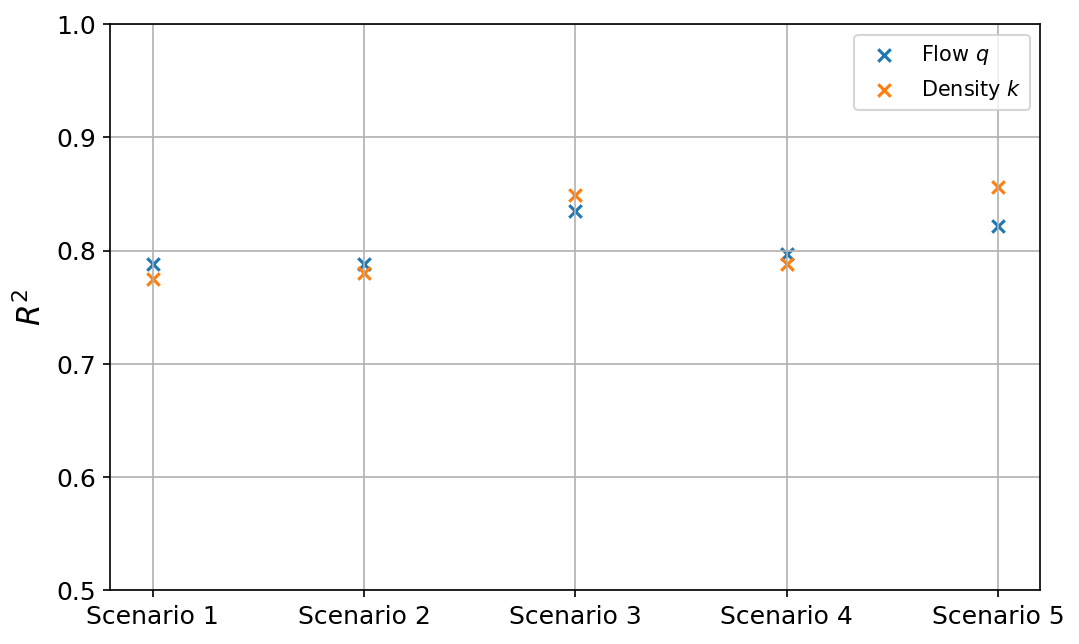

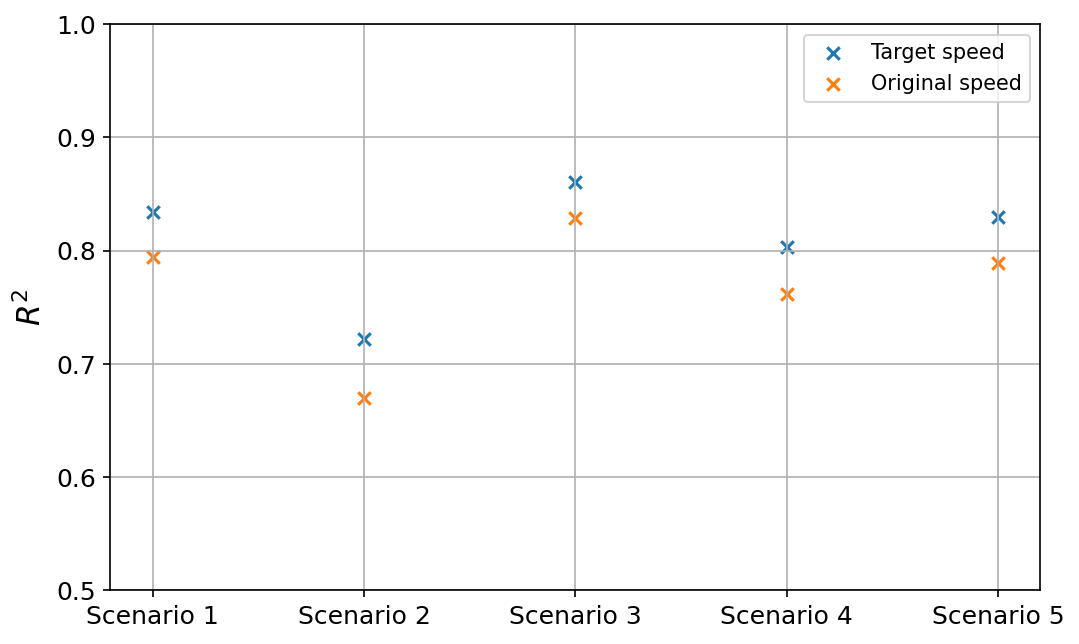

In [55]:
one_stage_r2d, one_stage_r2d_l = process_one_stage(one_stage_results,'r2n')
plot_metrics_all_param(one_stage_r2d,one_stage_r2d_l,y_lim=[0.5,1])
plot_metrics_all_param(one_stage_r2d,one_stage_r2d_l,['v_tar','v_ori'],y_lim=[0.5,1])

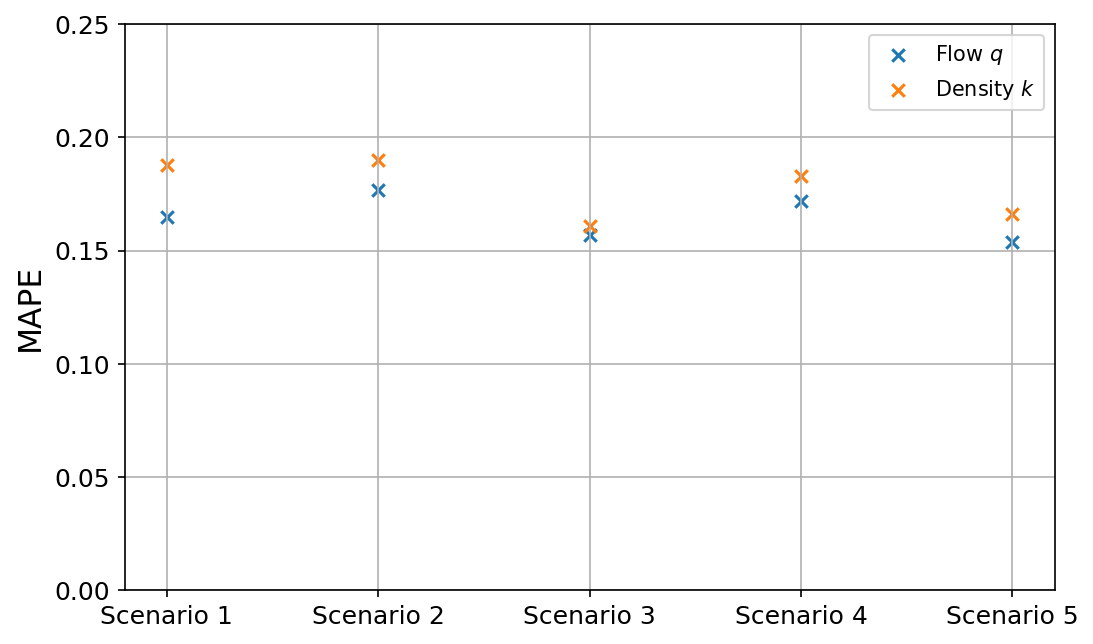

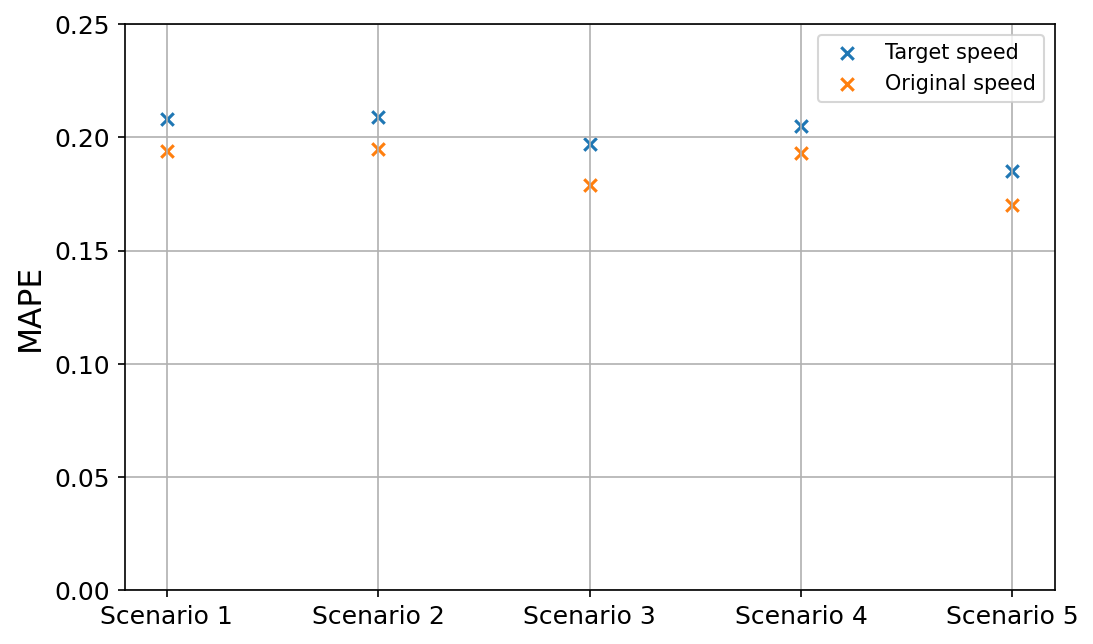

In [10]:
one_stage_r2d, one_stage_r2d_l = process_one_stage(one_stage_results,'map')
plot_metrics_all_param(one_stage_r2d,one_stage_r2d_l,['q','k'],'MAPE',y_lim = [0,0.25])
plot_metrics_all_param(one_stage_r2d,one_stage_r2d_l,['v_tar','v_ori'],'MAPE',y_lim = [0,0.25])

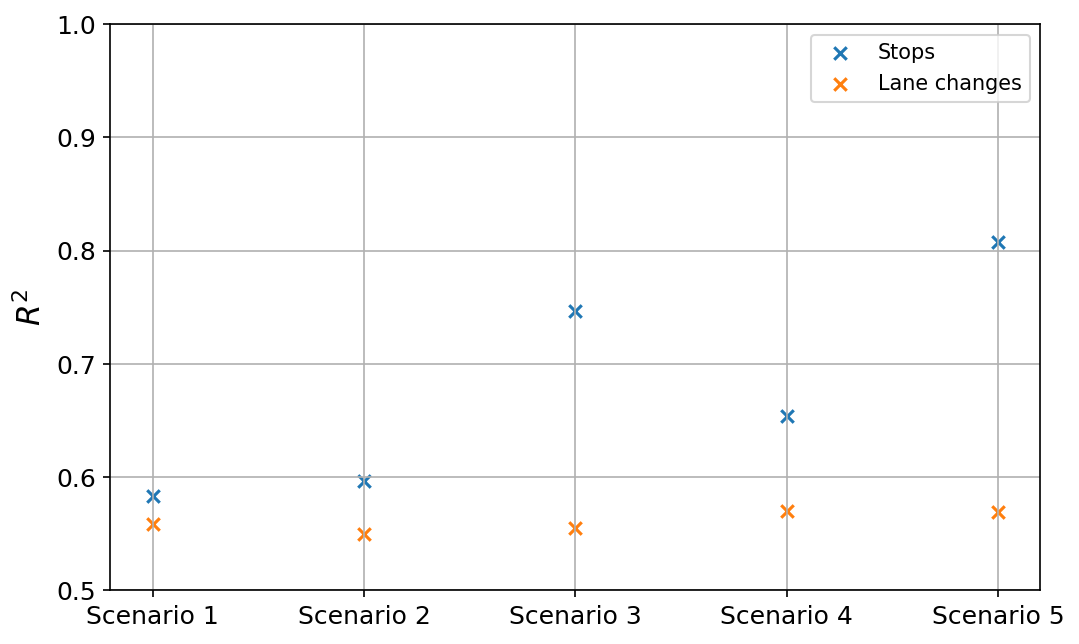

In [11]:
one_stage_r2d, one_stage_r2d_l = process_one_stage(one_stage_results,'r2n')
plot_metrics_all_param(one_stage_r2d,one_stage_r2d_l,['stop','lc'],y_lim=[0.5,1])